In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
pwd = os.getcwd()
path1 = pwd + '\\train.csv'
path2 = pwd + '\\test.csv'

train = pd.read_csv(path1)
test = pd.read_csv(path2)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
train.info()
#print('-'*40)
#test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Categorical Variables
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wright, Mr. George",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [8]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [17]:
#Another way to do it using boolean masking
men = train[train['Sex'] == 'male']['Survived']
rate = sum(men)/len(men)
print('% of men who survived: ', rate)

% of men who survived:  0.18890814558058924


In [23]:
surv_sex = train.groupby(['Survived','Sex']).count()['PassengerId']
surv_sex

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

<AxesSubplot:xlabel='Sex'>

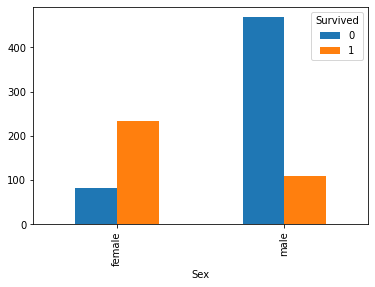

In [24]:
surv_sex.unstack(level=0).plot.bar()

In [26]:
#Usando este codigo vemos que los NaN se encuentran mayormente en hombres de la 3ra clase. Claro, porque hay mas hombres y mas gente en la 3ra clase.
train[train['Age'].isna()].groupby(['Sex','Pclass']).count()['PassengerId'].unstack(level=0)

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [28]:
#Fill the NaN values.
train['Age'].median()
train['Age'] = train['Age'].fillna(28.0)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
#Change Sex to int64
train['Sex'] = train['Sex'].map({'female':1,'male':0}).astype(int)

In [31]:
train[['Survived','Sex','Age','Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


<AxesSubplot:xlabel='FlagSolo'>

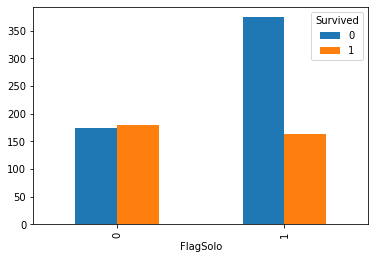

In [33]:
#What about people that traveled alone?
train['FlagSolo'] = np.where((train['SibSp']==0) & (train['Parch']==0),1,0)

g_flag = train.groupby(['Survived','FlagSolo']).count()['PassengerId']
print(g_flag)
g_flag.unstack(level=0).plot.bar()

In [35]:
#Here we go! lets model data
y_train = train['Survived']
X_train = train[['Sex','Age','Pclass','FlagSolo']]

In [36]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [37]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(modelo):
  disp = plot_confusion_matrix(modelo, X_train, y_train,
                        cmap=plt.cm.Blues, values_format="d")
  true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
  total_data = np.sum(disp.confusion_matrix)
  accuracy = true_pred/total_data
  print('accuracy: ', np.round(accuracy, 2))
  plt.show()

accuracy:  0.79


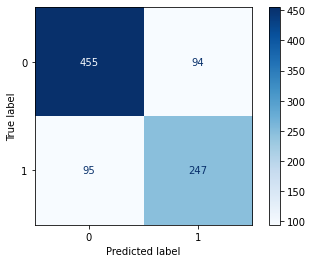

In [41]:
conf_mat_acc(logreg)

accuracy:  0.89


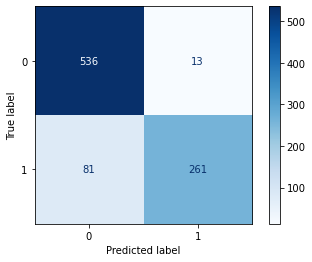

In [42]:
conf_mat_acc(d_tree)

In [43]:
# preprocesando test set

# hacer map a Sex
test['Sex'] = test['Sex'].map({'female': 1, 'male': 0}).astype(int)

# rellenar Age
test['Age'] = test['Age'].fillna(28.0)

# Crear FlagSolo
test['FlagSolo'] = np.where(
    (test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)

In [44]:
features = ['Sex', 'Age', 'Pclass', 'FlagSolo']
X_test = test[features]

In [46]:
# prediction of Survived using test set
Y_pred_log = logreg.predict(X_test)
Y_pred_tree = d_tree.predict(X_test)
print(Y_pred_log[0:10])

[0 0 0 0 1 0 1 0 1 0]
